# **Import libraries and data**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

import joblib
import shap

In [6]:
loc = 'D:/TMLC/Blueberry-Yield-Prediction/Dataset/'
name = 'WildBlueberryPollinationSimulationData.csv'
filename = loc + name

In [8]:
df = pd.read_csv(filename)

# **Exploratory Data Analysis**

## **Descriptive Analysis**

In [9]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

- The dataset has 777 rows and 17 columns
- All of the columns are numerical having int and float data types
- The dataset does not consist any null values
- Yield column is the target variable

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,777.0,388.000000,224.444871,0.000000,194.000000,388.000000,582.000000,776.000000
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000


## **Data Visualization**

**Univariate Analysis**

In [12]:
plt.rcParams['figure.figsize']=(10,10)

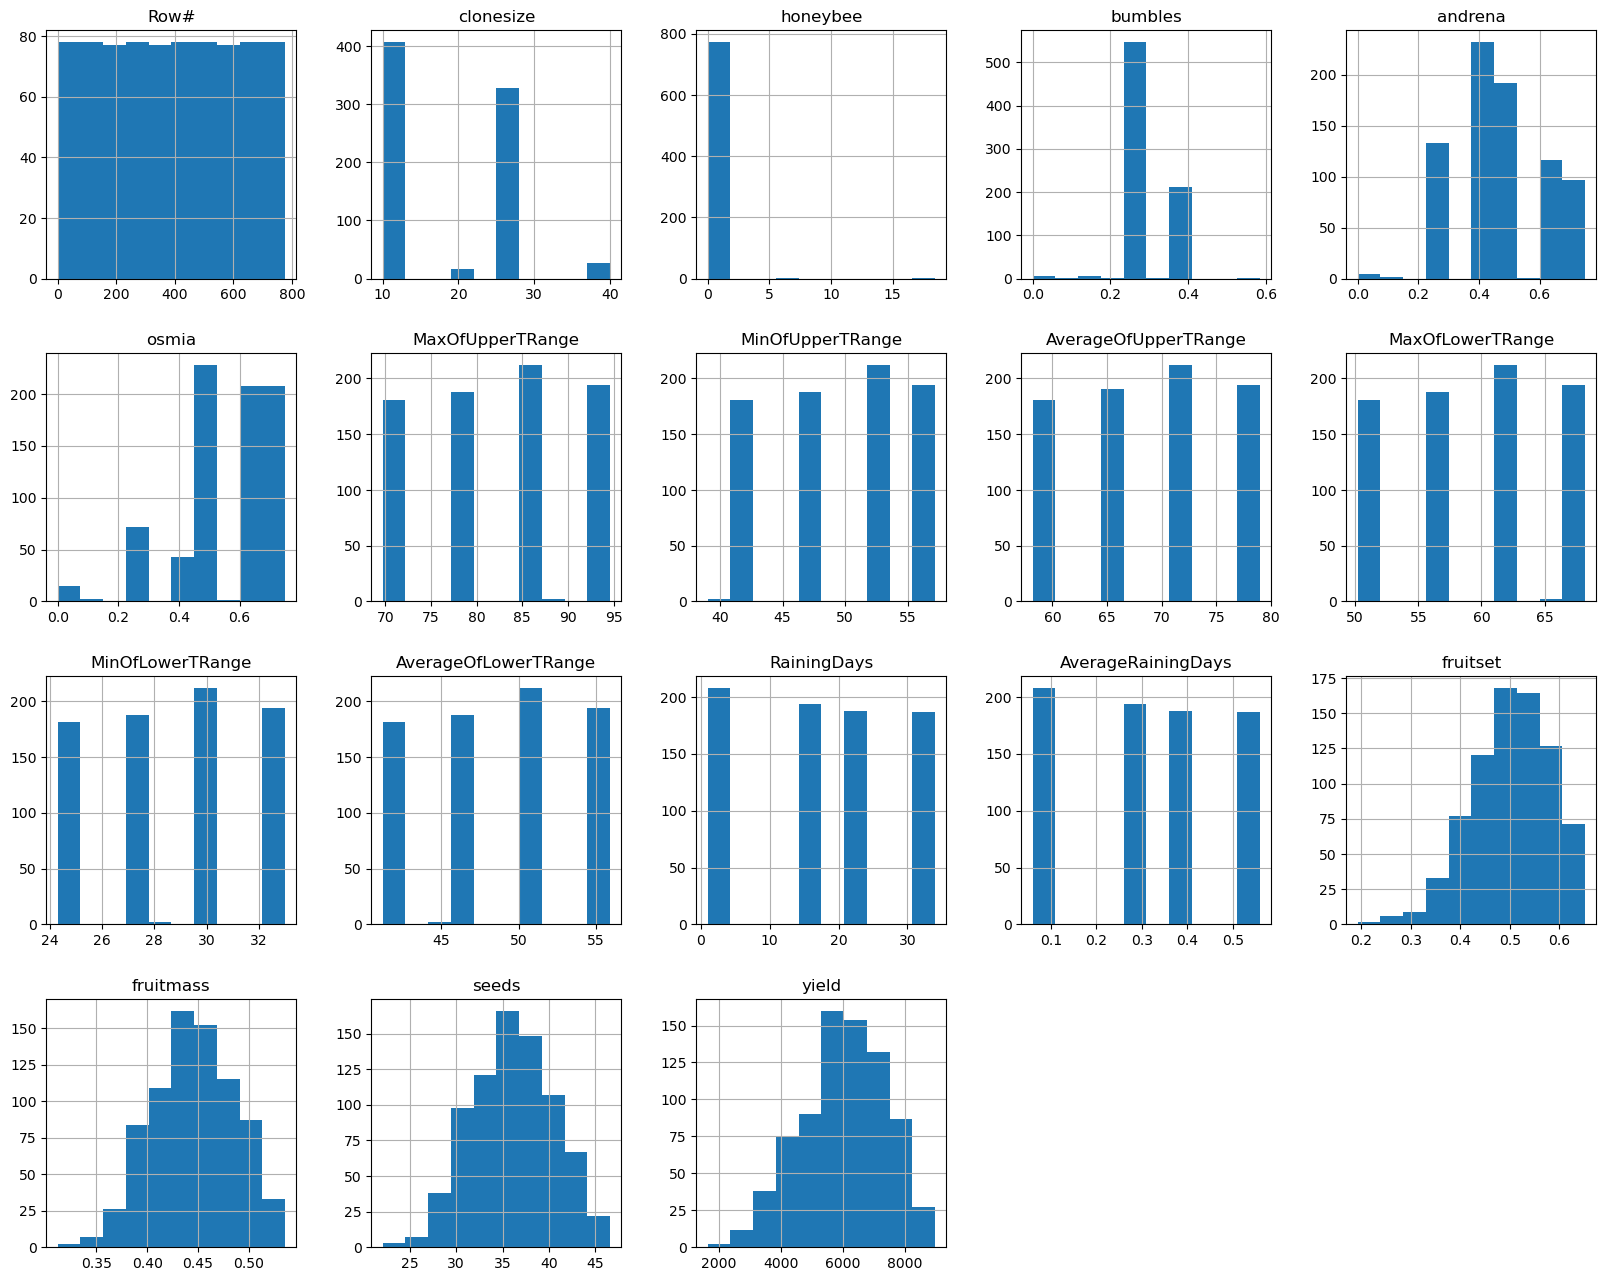

In [13]:
df.hist(layout=(5,5), figsize=(20,20))
plt.show()

- As shown in the plot above, the dataset has both continuous and discrete numeric values. 
- The fruitset, fruitmass, seeds and yield are continuous numeric values. 
- Donesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, MaxOfLowerTRange, AverageOfLowerTRange, RainingDays and AevrageRainingDays have discrete numeric values

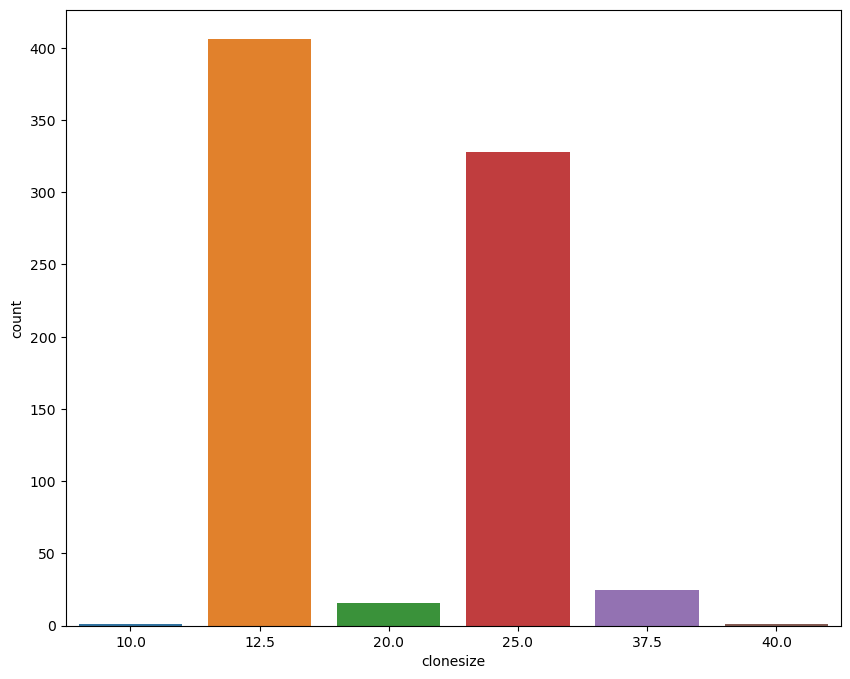

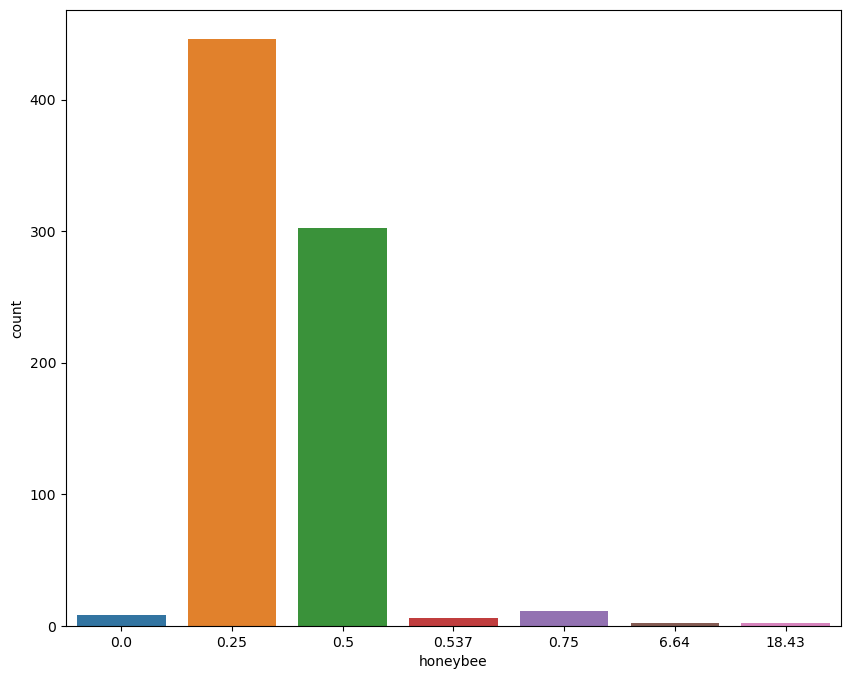

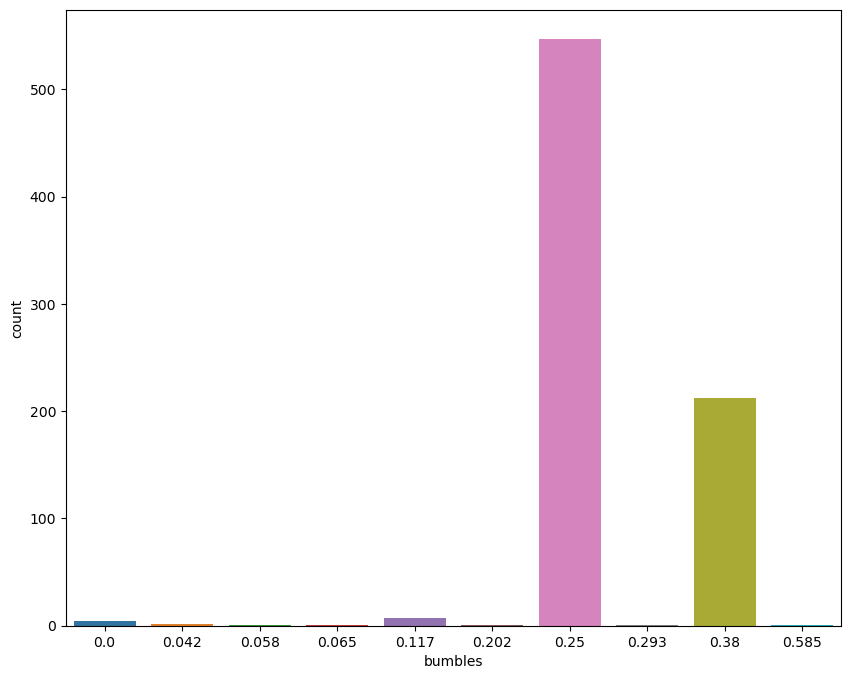

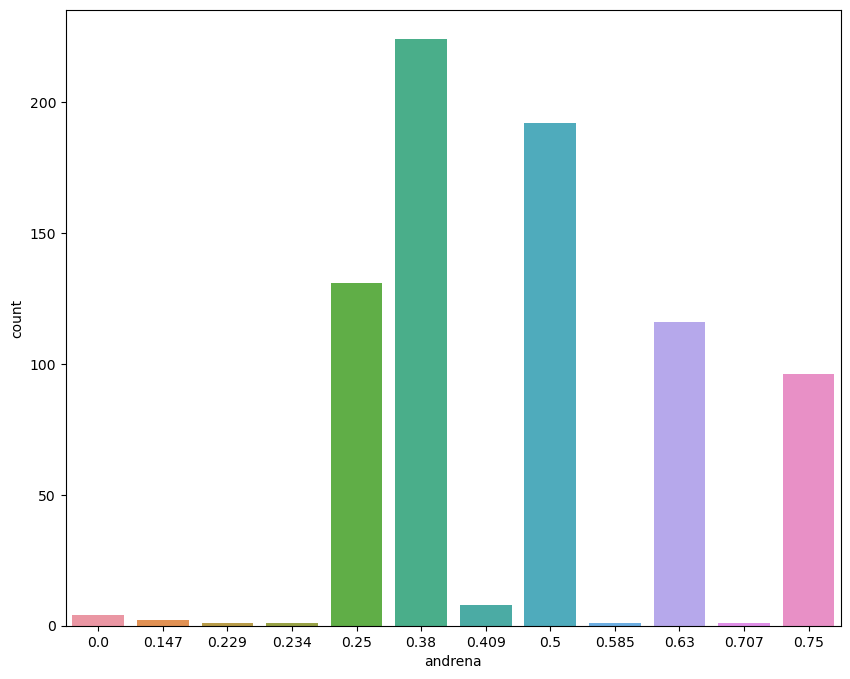

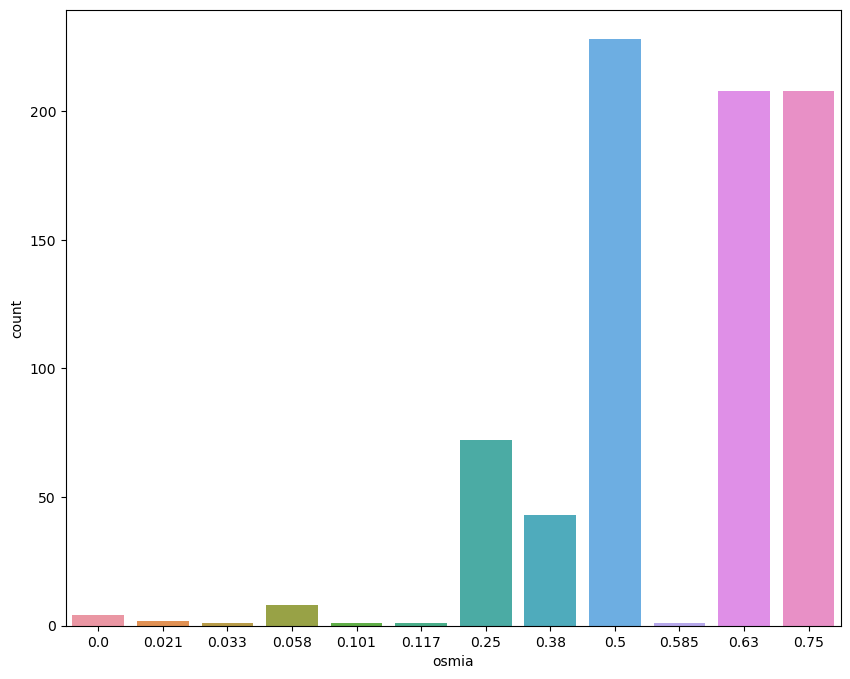

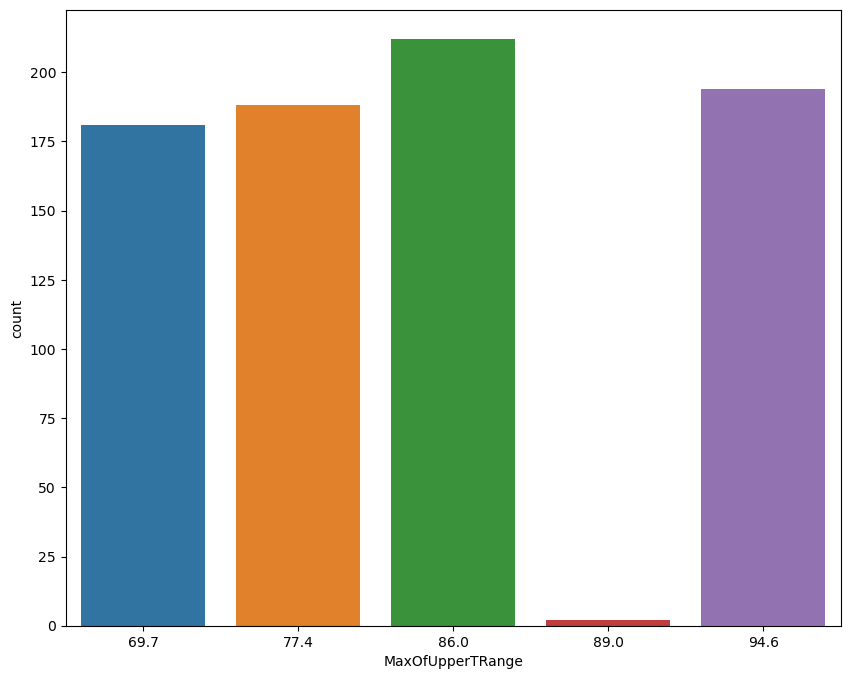

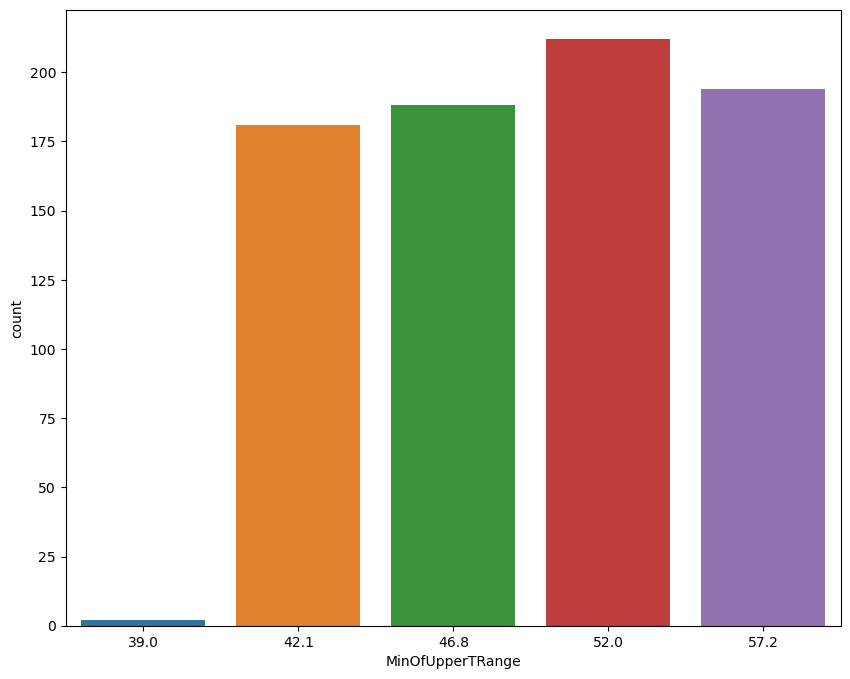

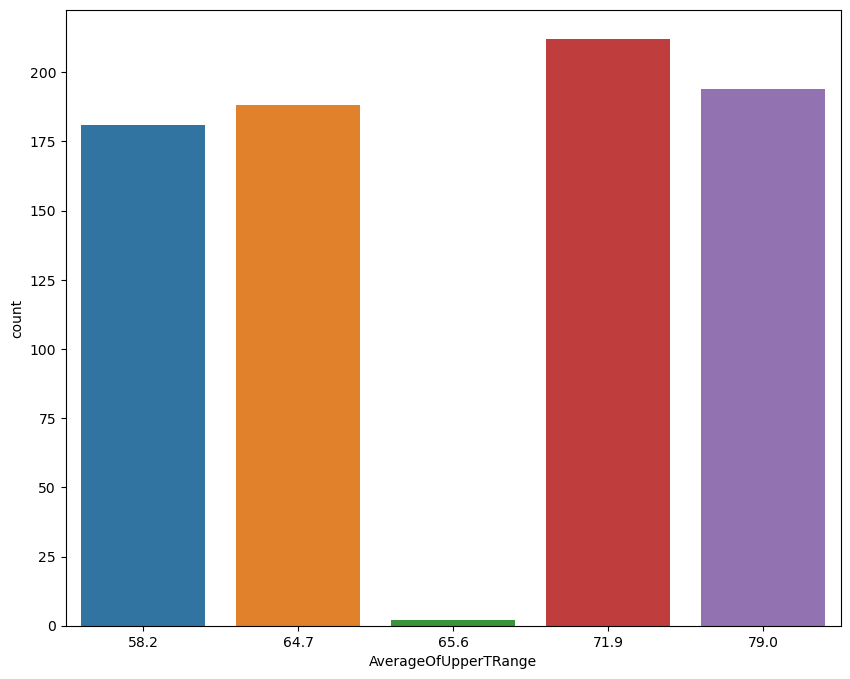

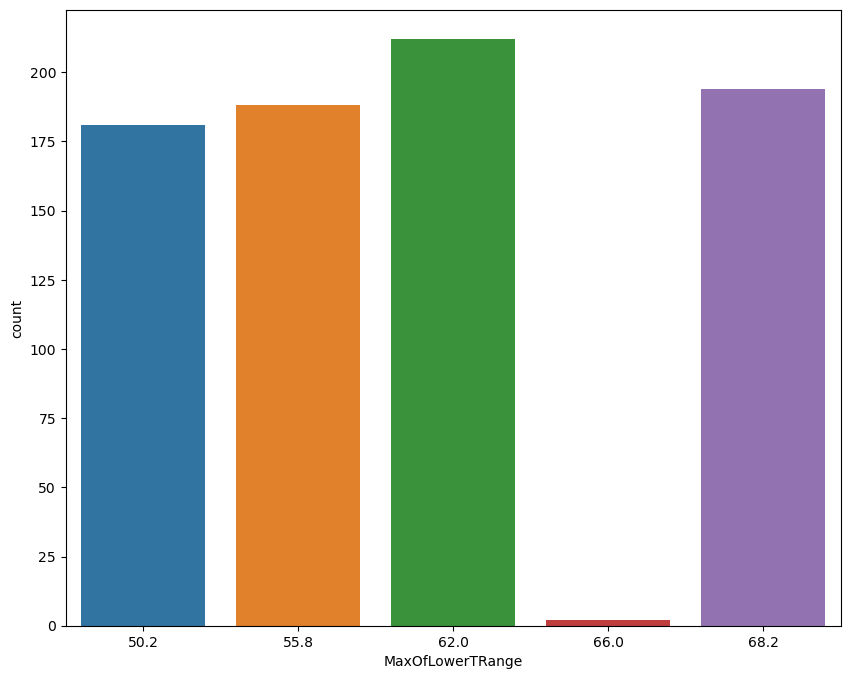

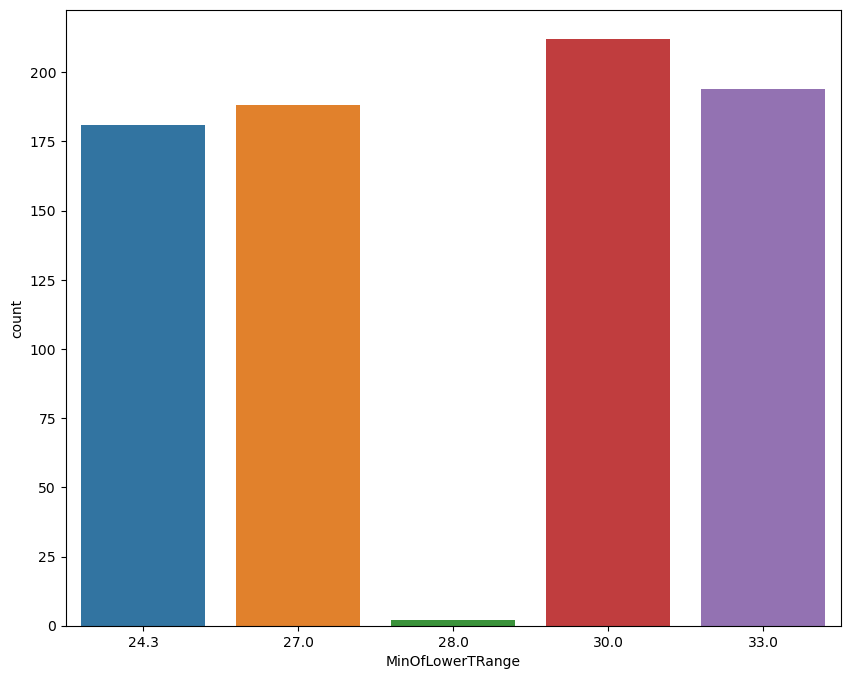

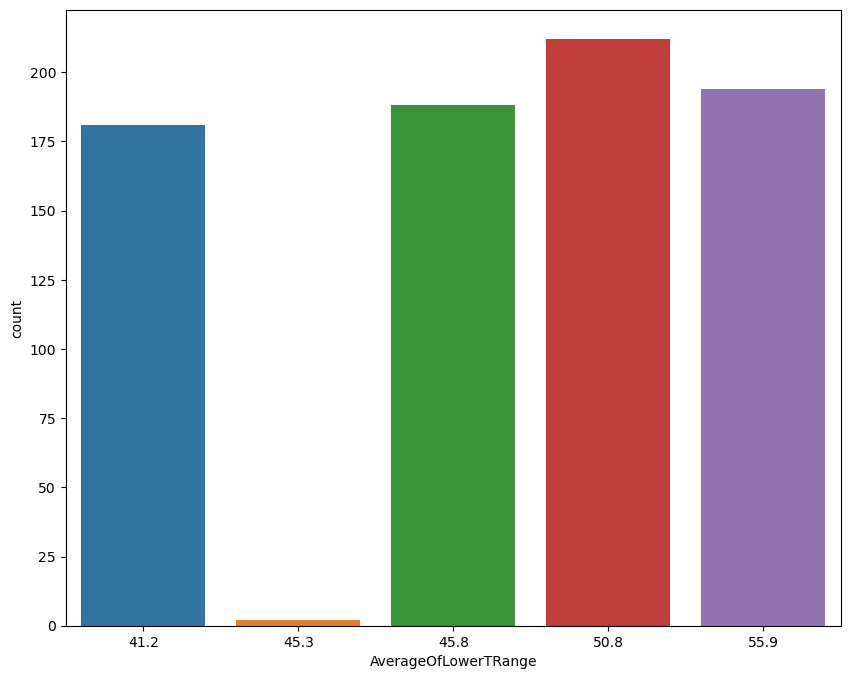

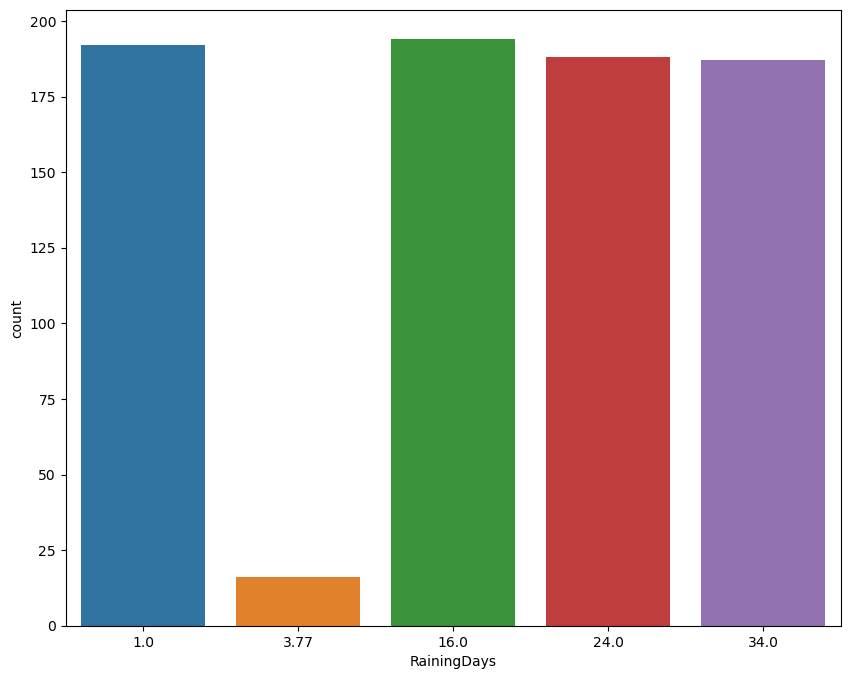

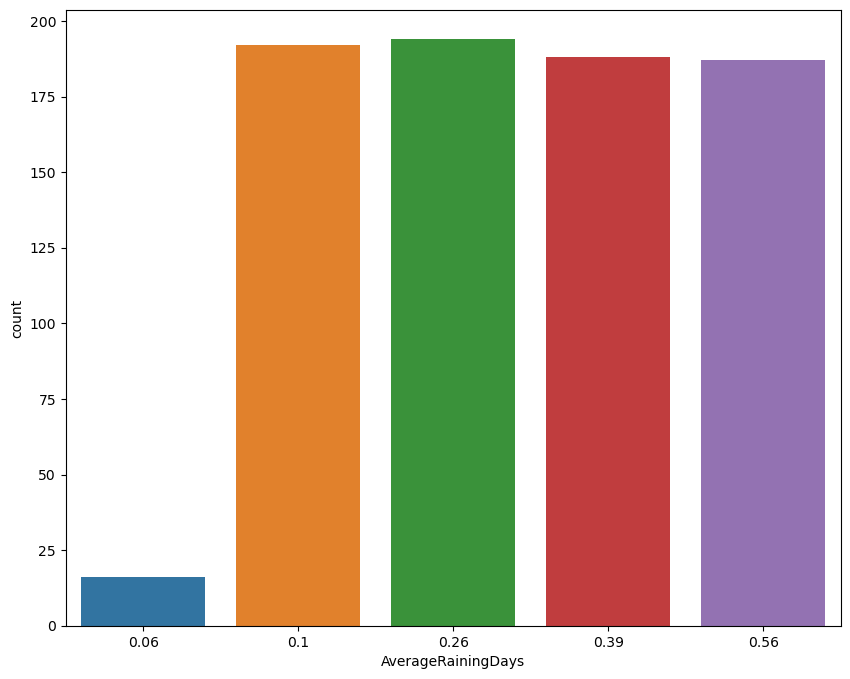

In [14]:
#Displaying discrete variables
for col in df:
    if df[col].nunique() <= 20:
        plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=df)
        plt.show()

- The most common clone size of the blueberry is 12.5 and 25.0 m2
- The most frequent density sizes of each bees are as follow: 0.25 for honeybee, 0.25 for bumbles, 0.38 for andrena and 0.5 for osmia
- Honeybee has the least density size among the bees
- The maximum, minimum and average upper band daily temperature recorded during the bloom season are 86, 52 and 71.9 degree fahrenheit, respectively.
- The maximum, minimum and average lower band daily temperature recorded during the bloom season are 62, 30 and 30.8 degree fahrenheit, respectively.
- The most common raining days are from 1, 16,24 and 34. Similary the averange raining days are greater than 0.06 (0.1, 0.26, 0.39 and 0.56). This means that rain is common to the location of the field.

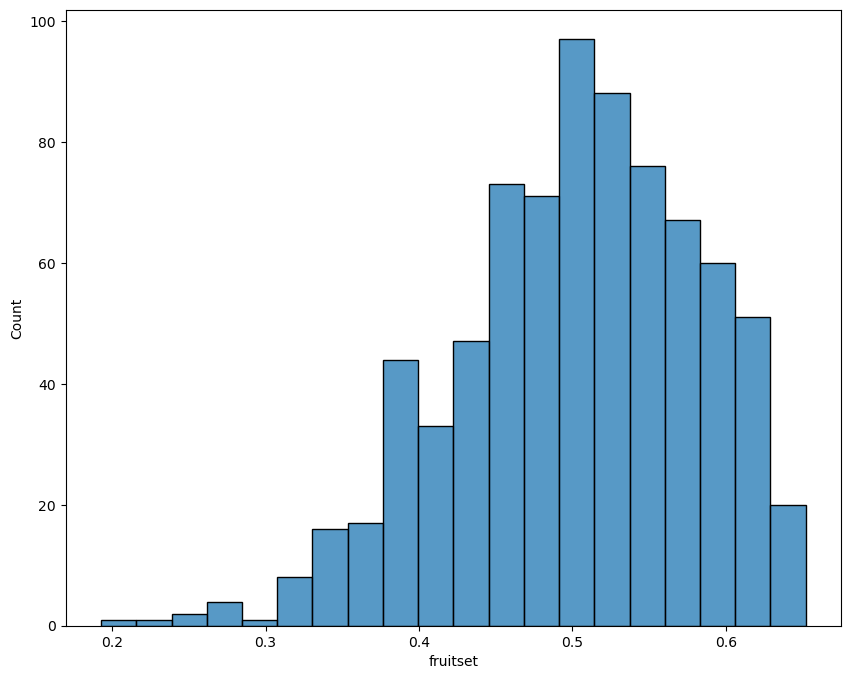

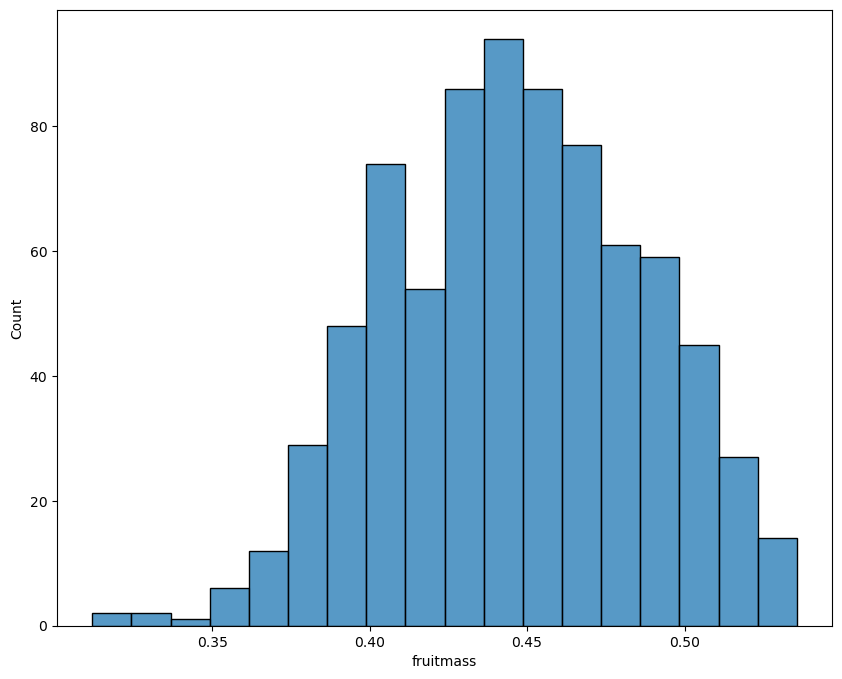

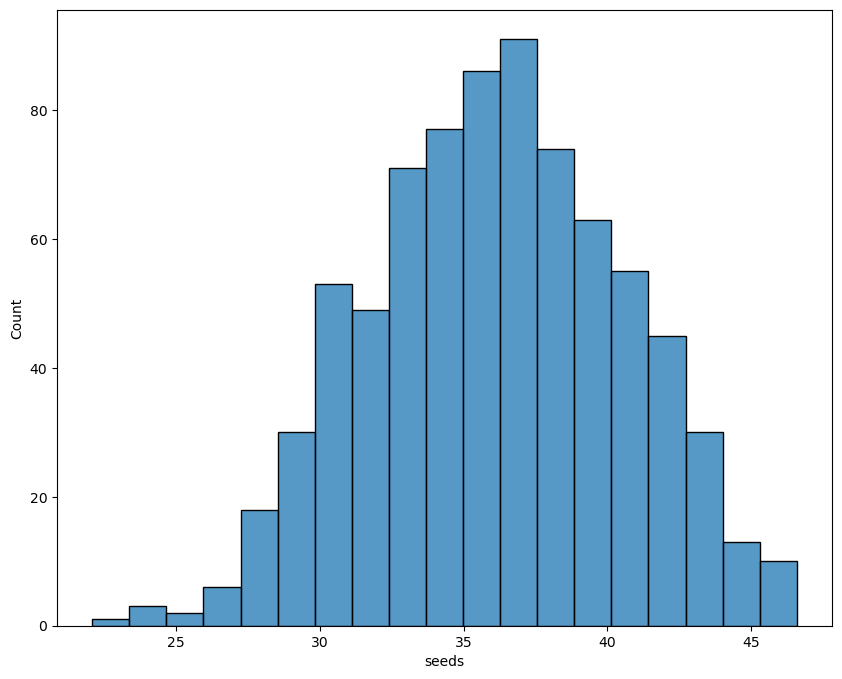

In [15]:
df_copy = df.drop(columns=['Row#','yield'])

#Displaying continuous variables
for col in df_copy:
    if df[col].nunique() >= 20:
        plt.figure(figsize=(10,8))
        sns.histplot(x=col, data=df_copy)
        plt.show()


- Most of the continuous numerical features are normally distributed except for fruitset is skewed to the left.
- The most common fruit set of the wild berry ranges from 0.45 to 0.55.
- The most common fruit mass of the wild berry ranges from 0.42 to 0.46.
- the most common seed count of the wild berry ranges from 35 to 37.

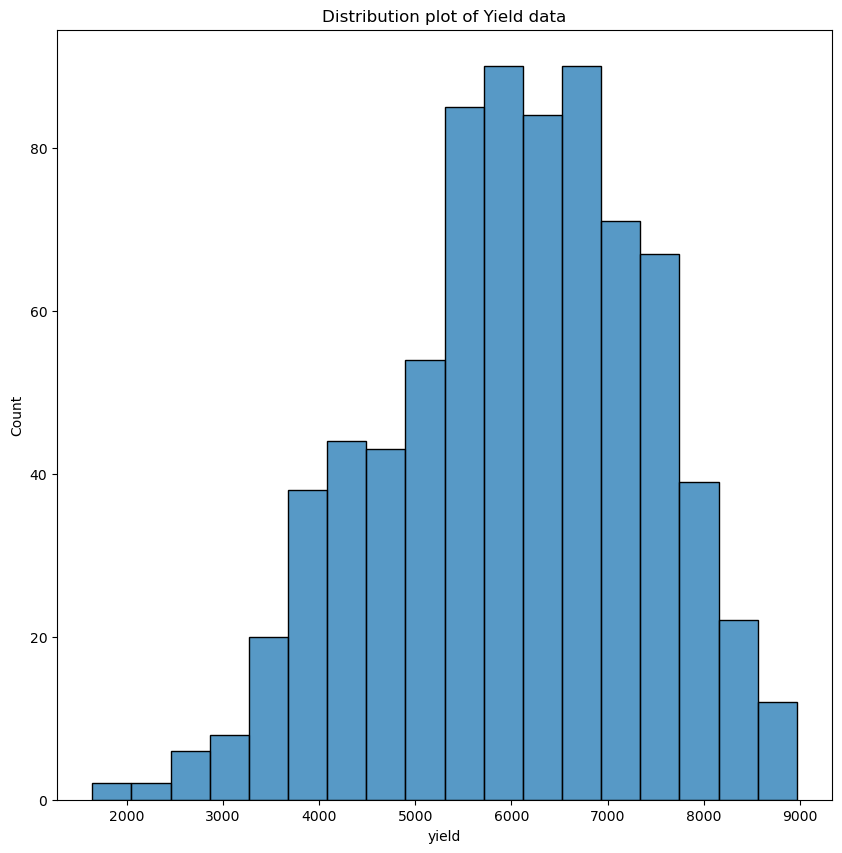

In [16]:
#Target Variable
sns.histplot(data=df, x='yield')
plt.title('Distribution plot of Yield data')
plt.show()

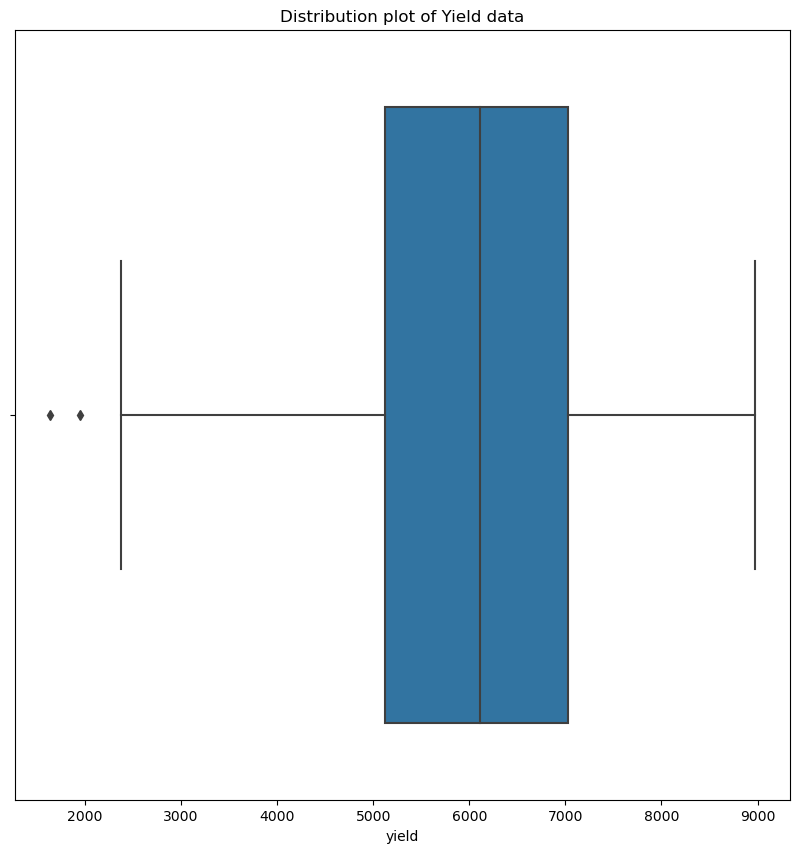

In [17]:
sns.boxplot(data=df, x='yield')
plt.title('Distribution plot of Yield data')
plt.show()

- As shown by the histogram plot of the target variable, the graph is slightly skewed to the left
- Outliers are present at the lower bound of the boxplot. These outliers were causing the graph to be skewed.

**Multivariate Analysis**

<AxesSubplot:xlabel='clonesize', ylabel='yield'>

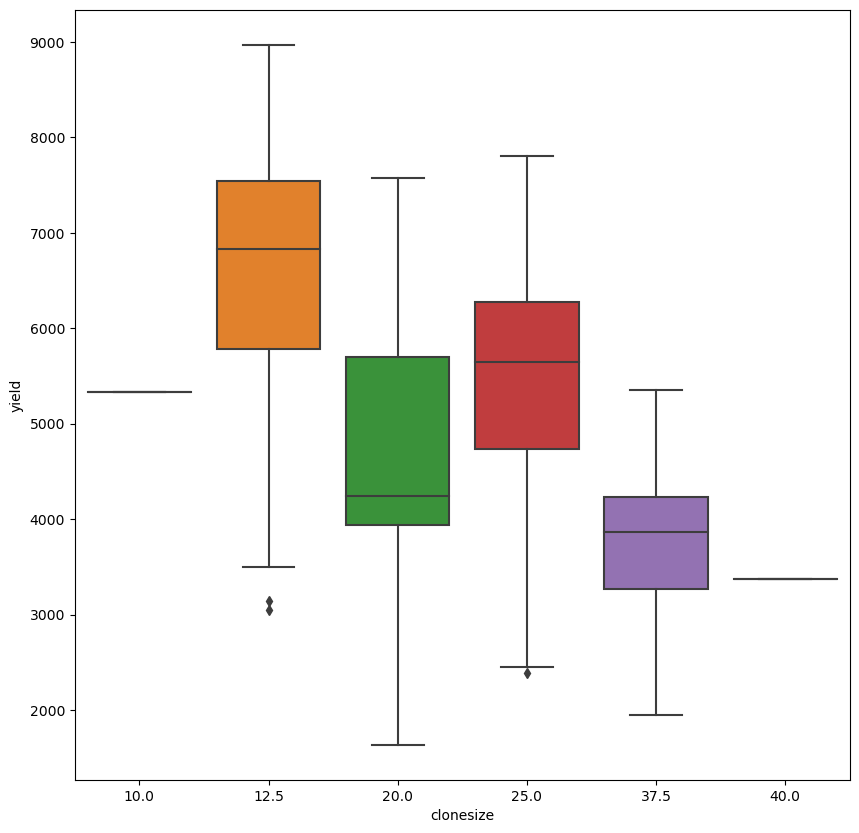

In [18]:
# clonesize and yield
sns.boxplot(data=df, x='clonesize', y='yield')

sns.pairplot(df)
plt.show()

- clonesize 12.5 and 25.0 have the highest number of yield since these two sizes have the most frequent. 

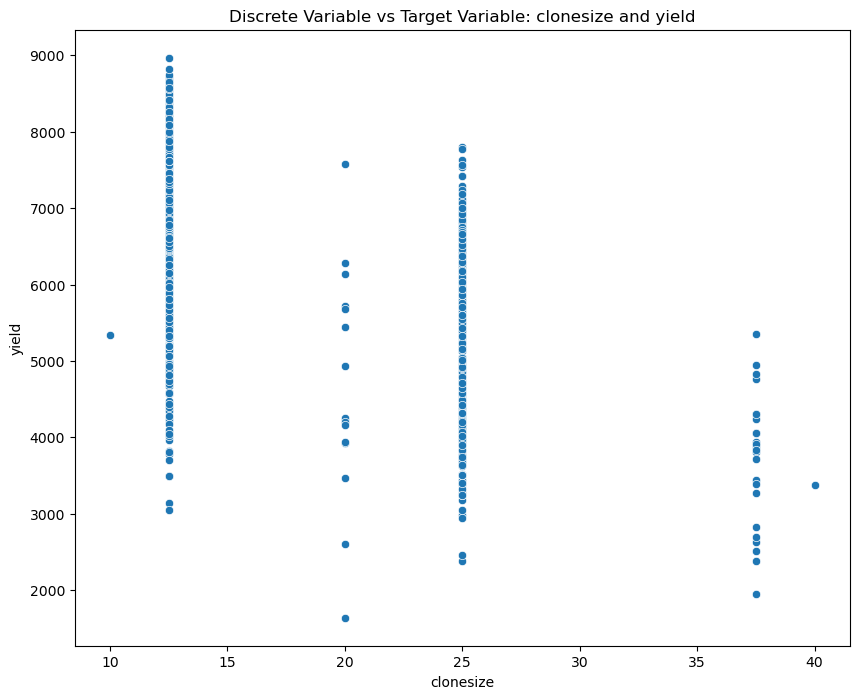

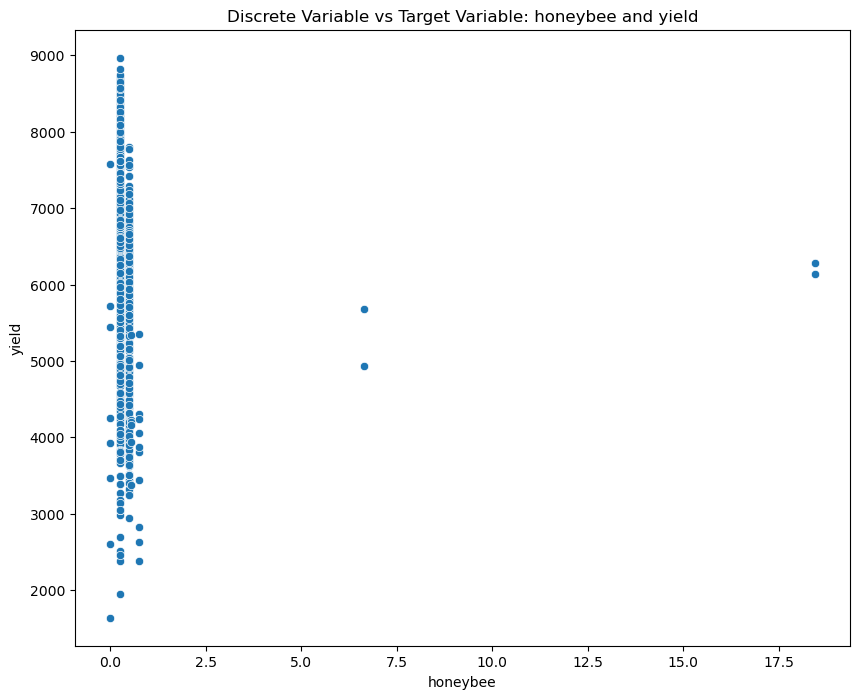

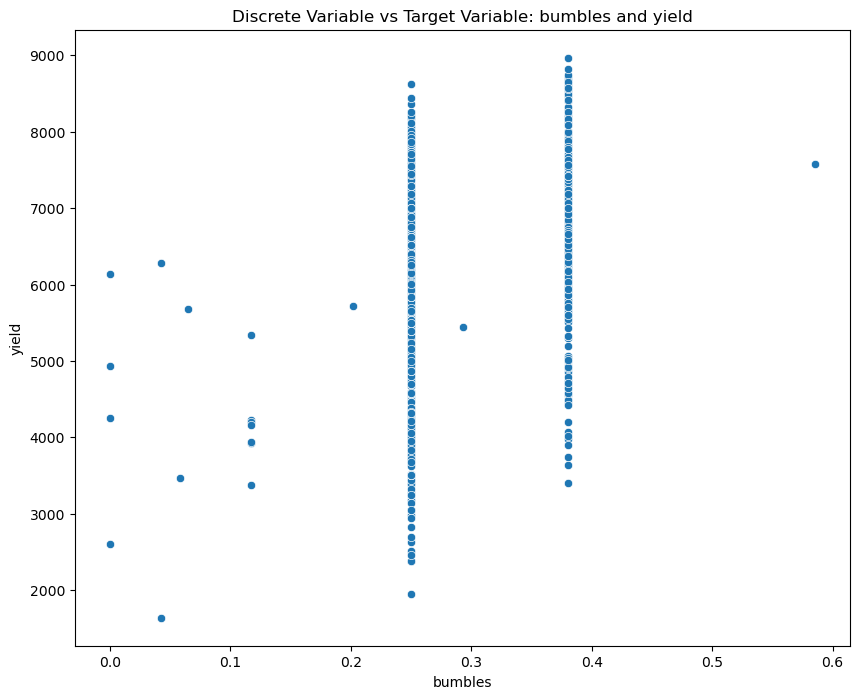

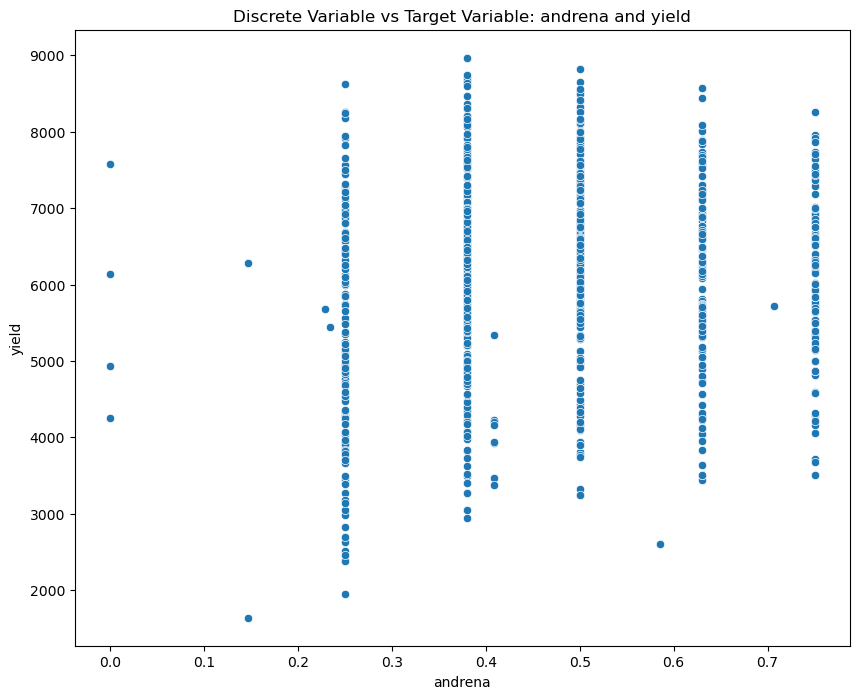

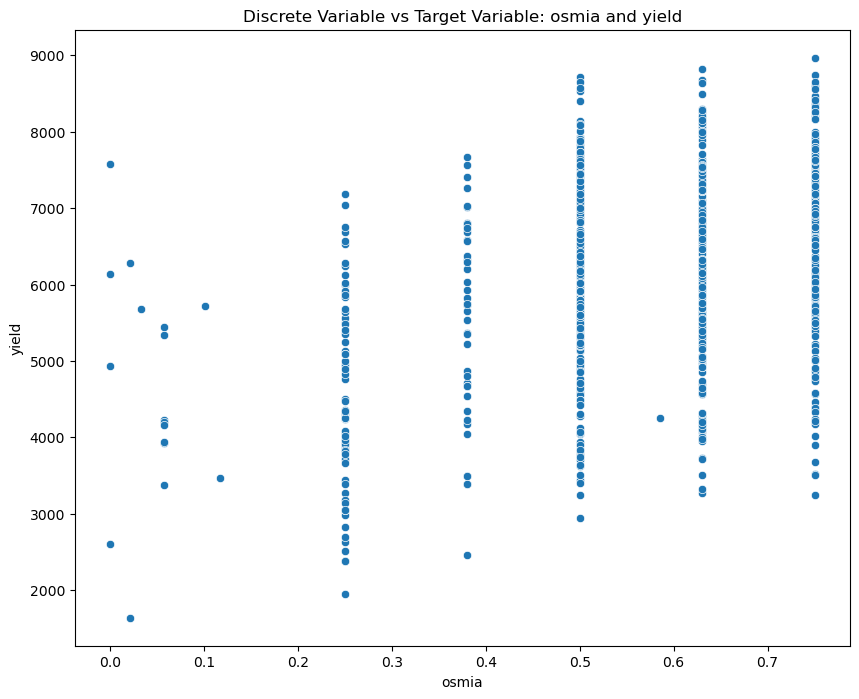

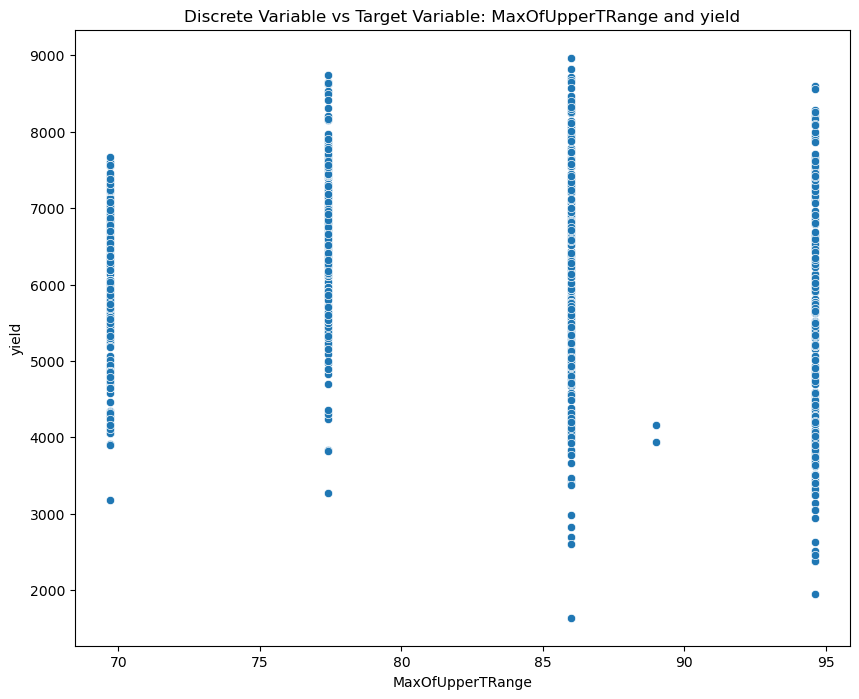

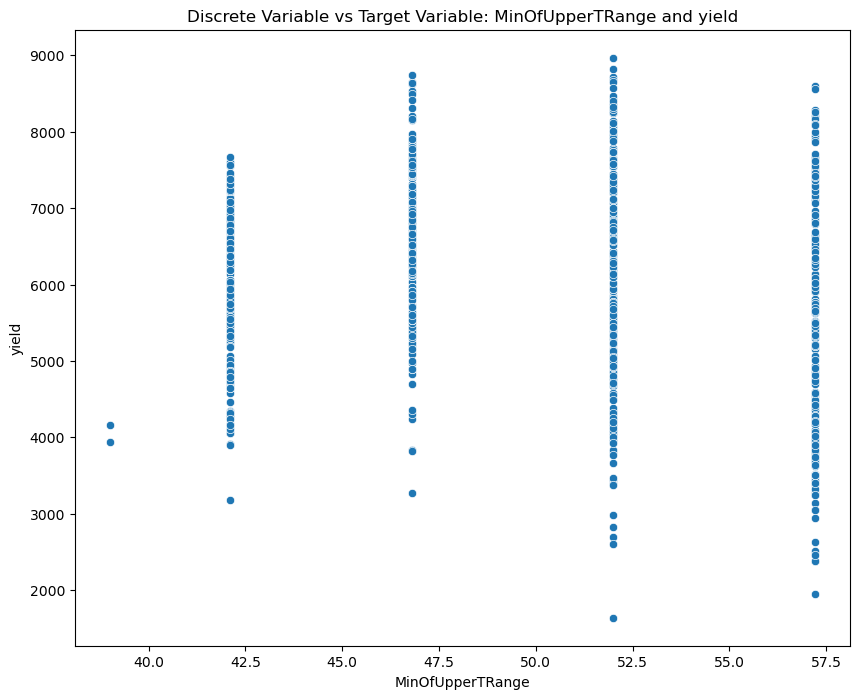

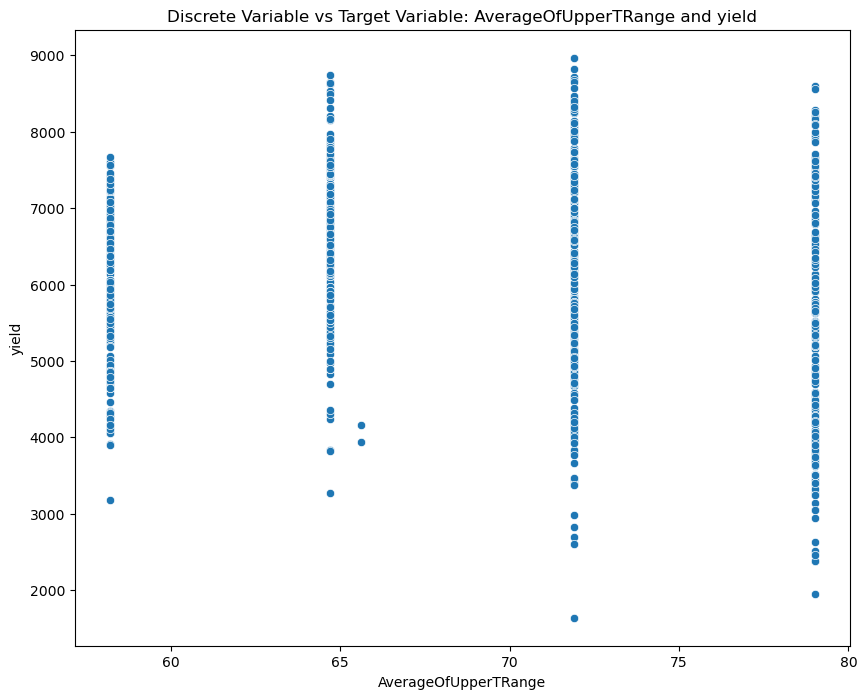

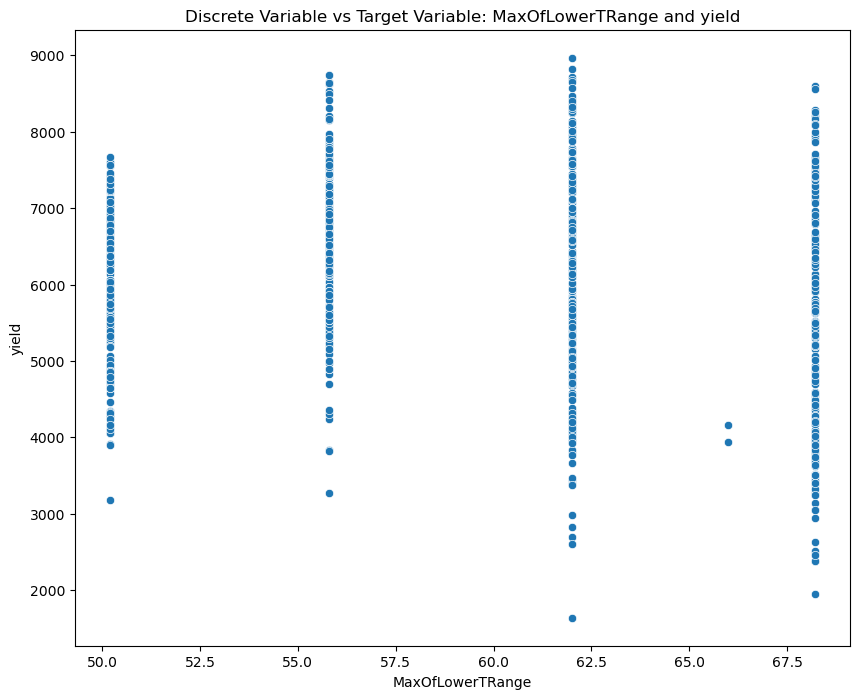

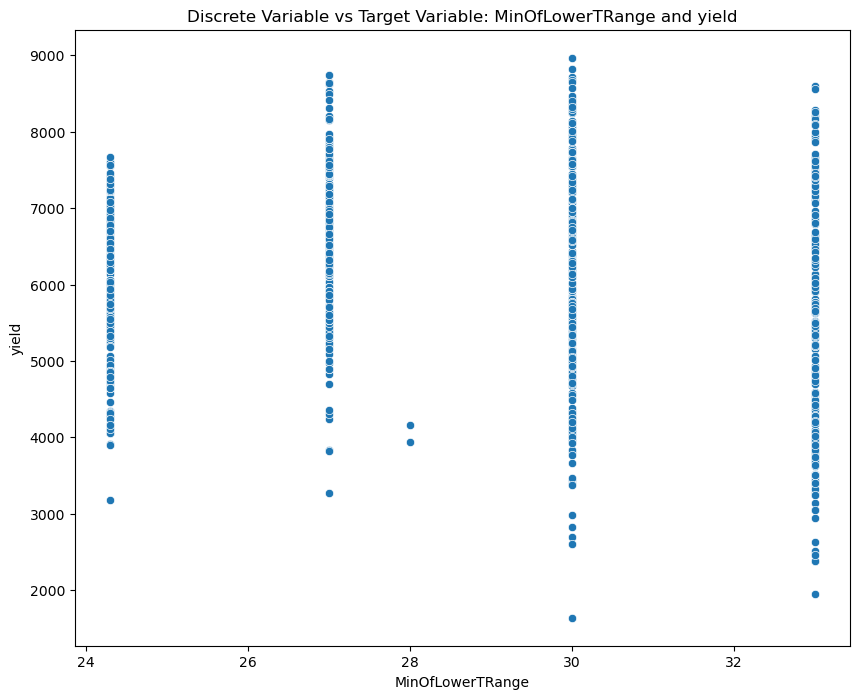

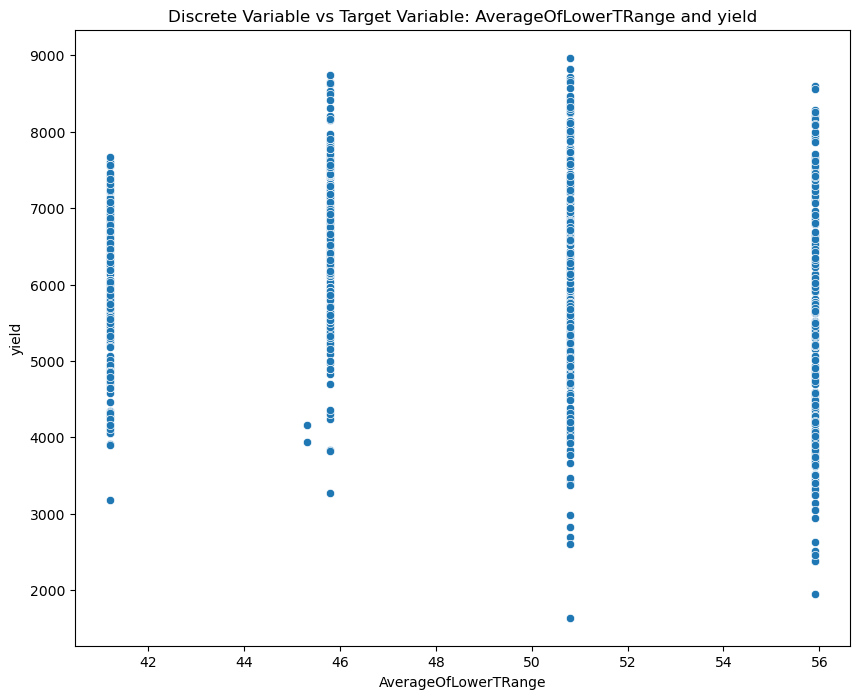

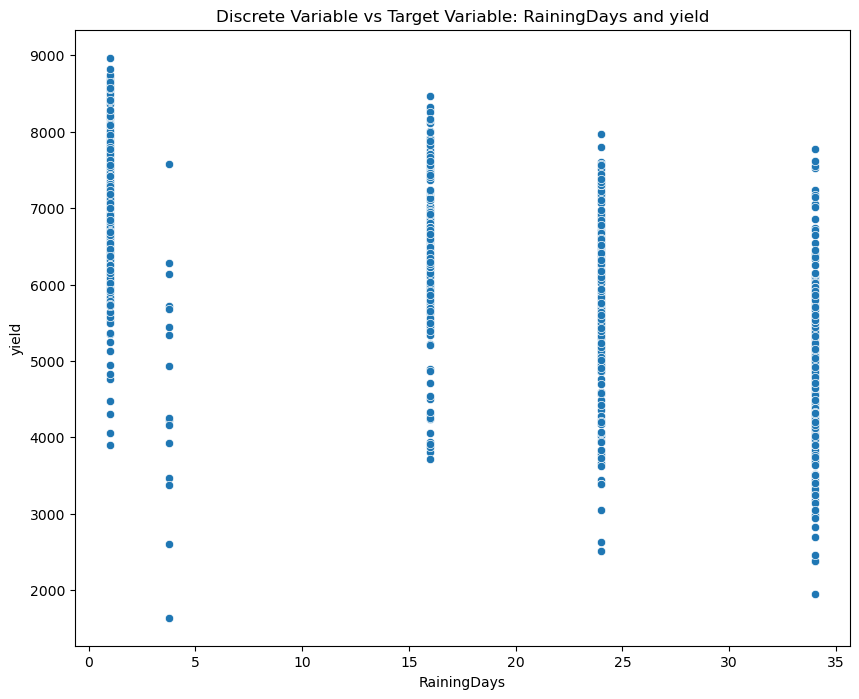

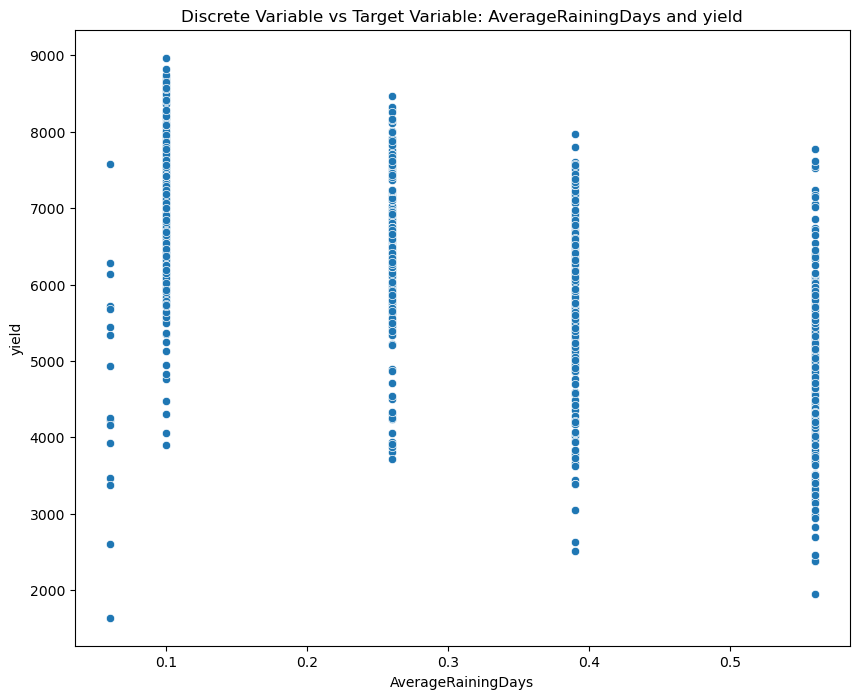

In [19]:
# bees and yield
#Displaying continuous variables
for col in df:
    if df[col].nunique() <= 20:
        plt.figure(figsize=(10,8))
        sns.scatterplot(x=col, y='yield', data=df)
        plt.title(f'Discrete Variable vs Target Variable: {col} and yield')
        plt.show()

- Clonesize 12.5, 25 and 37 have the most wild berry yield values.
- Honeybee around 0.25 density produces more wild berry yield to the field 

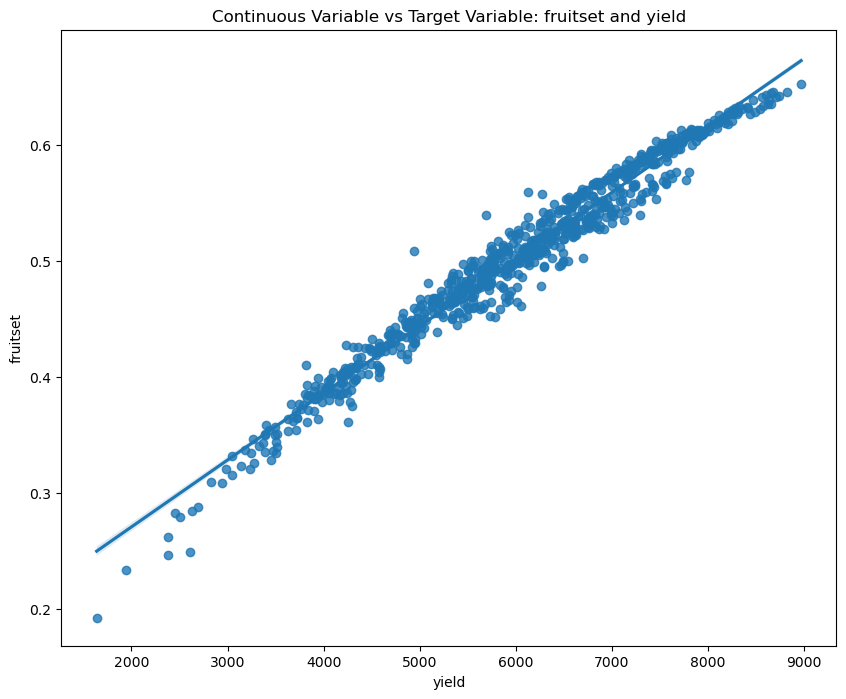

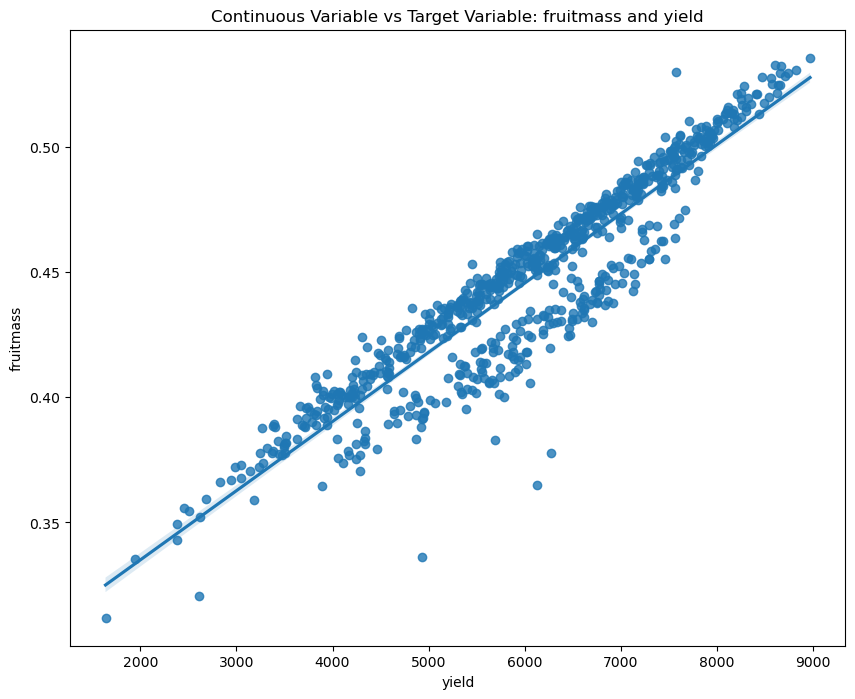

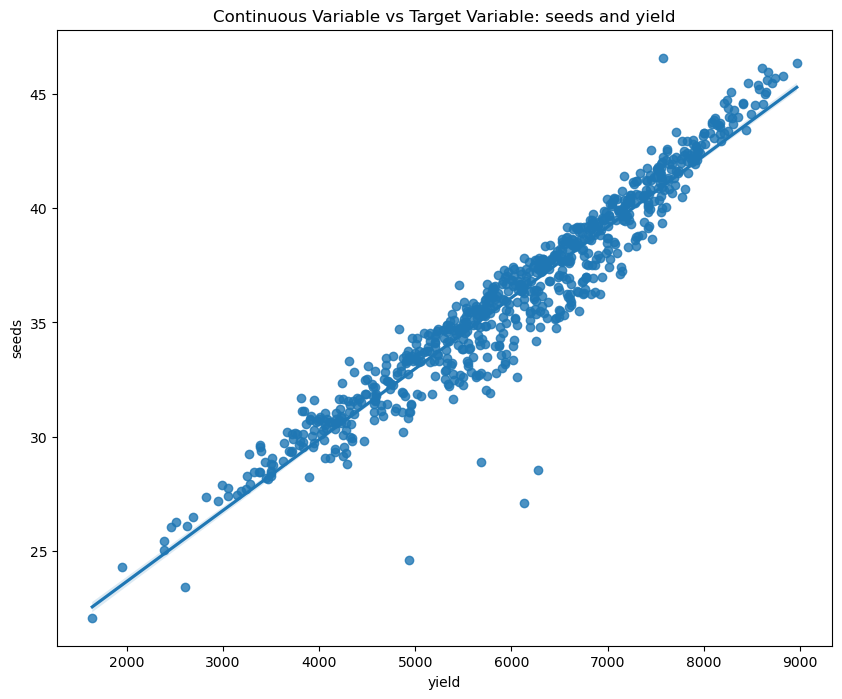

In [20]:
col = ['fruitset','fruitmass','seeds']

#Displaying continuous variables
for col in col:
    if df[col].nunique() >= 20:
        plt.figure(figsize=(10,8))
        sns.regplot(y=col, x='yield', data=df)
        plt.title(f'Continuous Variable vs Target Variable: {col} and yield')
        plt.show()

- The columns fruitset, fruitmass and seeds are directly proportional with yield. As the value of these columns increases, the yield value also increases
- These columns can be use as a feature in predicting the yield value of the wild berry.

In [21]:
def plot_corr(df,figsize):
    # Create the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle 
    mask = np.triu(np.ones_like(corr, dtype=bool))


    # Add the mask to the heatmap
    plt.figure(figsize=(figsize))
    sns.set(font_scale=1)
    sns.heatmap(corr, mask=mask, cmap = sns.color_palette("Blues"), center=0, linewidths=1, fmt=".2f", annot=True)

    plt.title('Correlation between numerical features')
    plt.show()

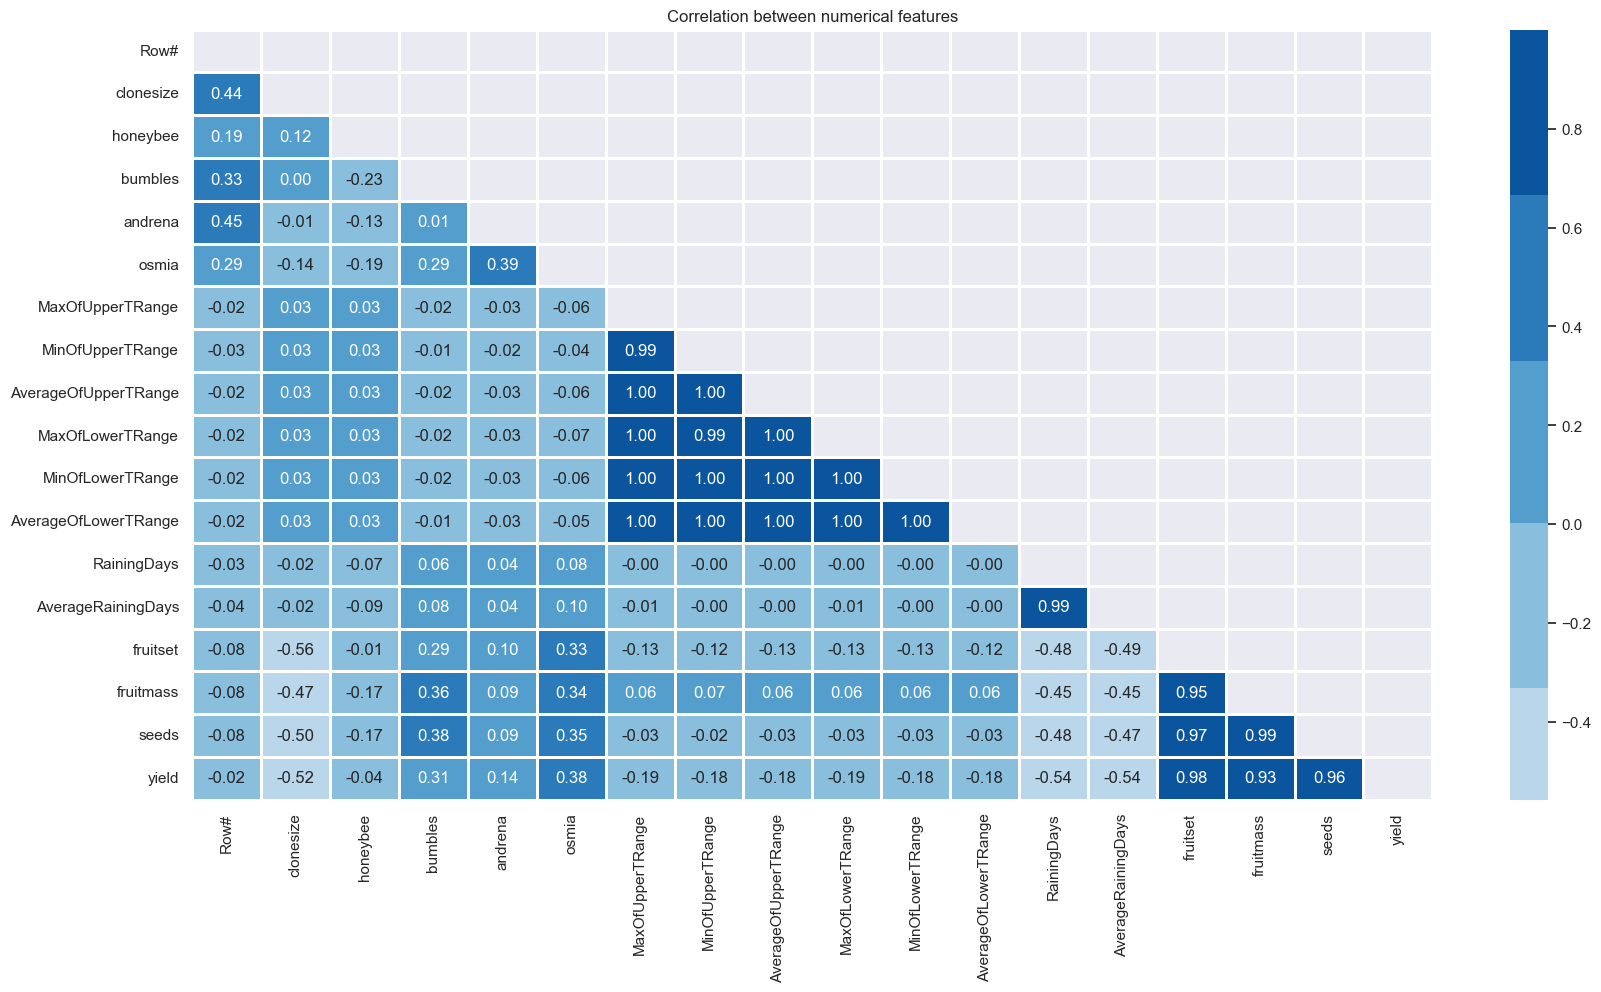

In [22]:
plot_corr(df, (20,10))

- The following columns have positive and high correlation to the target variable: fruitset, fruitmass and seeds
- The 'Row#' column has a very low correlation value to 'yield' column. It seems it does not have an impact with our target variable
- MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange and AverageOfLowerTRange have strong correlation (corr = 1) with one another.
- RainingDays and AverageRainingDays have strong correlation (corr = 0.99) with one another.

# Data Preprocessing

In [23]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [24]:
df.duplicated().sum()

0

df.drop(columns='Row#',inplace = True)
df.head()

In [25]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [26]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [27]:
bee = ['honeybee', 'bumbles', 'andrena', 'osmia']
compute_vif(bee).sort_values('VIF', ascending=False)

,Variable,VIF
3,osmia,1.315099
2,andrena,1.201019
1,bumbles,1.155089
0,honeybee,1.083314


In [28]:
considered_features = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,MaxOfUpperTRange,inf
1,MinOfUpperTRange,inf
2,AverageOfUpperTRange,inf
3,MaxOfLowerTRange,inf
4,MinOfLowerTRange,inf
5,AverageOfLowerTRange,inf


In [29]:
considered_features = ['RainingDays', 'AverageRainingDays']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,RainingDays,58.354438
1,AverageRainingDays,58.354438


- Aside from having high correlation, the columns 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange' and 'AverageOfLowerTRange' have infinite VIF or high collinearity.
- Among the Temperature Range columns, only one column will be selected >> AverageOfLowerTRange. The remaining will be dropped
- Similarly to the Raining Days columns, AverageRainingDays will be selected while RainingDays will be dropped

In [30]:
to_drop = ['Row#','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
           'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays']
df.drop(columns=to_drop,inplace=True)
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,50.8,0.39,0.354413,0.382703,28.873714,3436.493543


In [31]:
X = df.drop(columns = 'yield')
y = df['yield']

In [32]:
print("Training data size:", X.shape)
print("Testing data size:", y.shape)

Training data size: (777, 10)
Testing data size: (777,)


## Feature Selection

In [33]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature 0: 0.135243
Feature 1: 0.067361
Feature 2: 0.053986
Feature 3: 0.038745
Feature 4: 0.101811
Feature 5: 0.087345
Feature 6: 0.167720
Feature 7: 1.920671
Feature 8: 1.561854
Feature 9: 1.623503


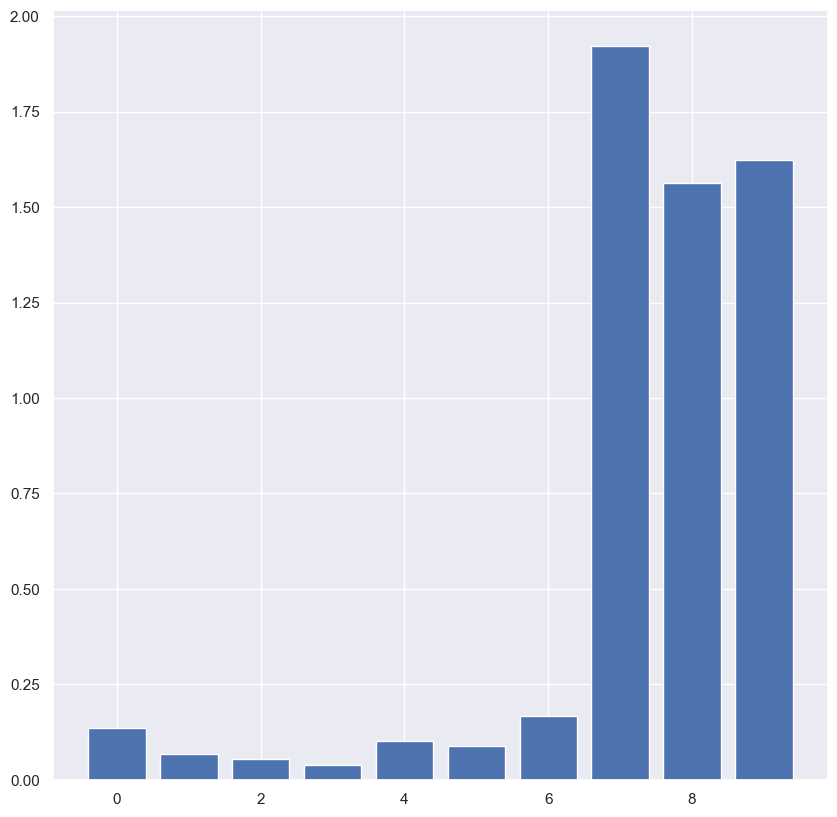

In [34]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

We will be training the model using the 9 important features as shown above.

## Model Development

In [35]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    
def evaluate_model(model, X_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Display the model's matrix
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred) 

    return {'rmse':rmse, 'mae':mae, 'mse':mse,'r2':r2}

**Baseline Model**

In [36]:
#RandomForest
rf = RandomForestRegressor()
#DecisionTree
dt = DecisionTreeRegressor()
#XgBoost Regressor
xgb = XGBRegressor()
# LGBM Regressor
lgbm = LGBMRegressor()


model = {'RandomForest': rf, 'DecisionTree': dt, 'XGBoost': xgb, 'LGBMRegressor': lgbm}

In [37]:
for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train_fs,y_train)
    mod = evaluate_model(model_values, X_train_fs, y_train)
    # Print result
    print('--Training Metrics--')
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])
    mod = evaluate_model(model_values, X_test_fs, y_test)
    # Print result
    print('--Testing Metrics--')
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  RandomForest
--Training Metrics--
RMSE:
 62.21736693101822
MAE:
 45.09204685909735
MSE:
 3871.0007478289594
R2:
 0.9978199480929526
--Testing Metrics--
RMSE:
 153.45732578698883
MAE:
 119.52968910435905
MSE:
 23549.150837694026
R2:
 0.9880791366400259
------------
Model:  DecisionTree
--Training Metrics--
RMSE:
 0.0
MAE:
 0.0
MSE:
 0.0
R2:
 1.0
--Testing Metrics--
RMSE:
 208.10074601994546
MAE:
 157.01243621367524
MSE:
 43305.92049405784
R2:
 0.9780780222418365
------------
Model:  XGBoost
--Training Metrics--
RMSE:
 8.354823855326936
MAE:
 5.944048069247813
MSE:
 69.80308165354003
R2:
 0.9999606886303595
--Testing Metrics--
RMSE:
 144.6560227673659
MAE:
 109.90363105896101
MSE:
 20925.36492287268
R2:
 0.9894073286241863
------------
Model:  LGBMRegressor
--Training Metrics--
RMSE:
 95.74314277487095
MAE:
 62.71149283757135
MSE:
 9166.749388409324
R2:
 0.9948375134009377
--Testing Metrics--
RMSE:
 162.2490799936328
MAE:
 115.35253203543084
MSE:
 26324.763958780248


As shown in the result above, all of the model have high training and testing r2 score. Although by comparing the MSE and MAE values, XGBoost has the lowest among the four. 

We will be using XGBoost model to further optimize.

**Hyperparameter Tuning**

In [38]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
xgb = XGBRegressor()

params_xgb={'objective':['reg:squarederror'],
        'max_depth': [16,20,25], 
        'n_estimators':[1500,2000],
       # 'learning_rate':[0.001,0.01,0.1],
        'model__subsample': [i/10. for i in range(17,20)] 
           }

# define grid search
grid_search = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv = cv, 
                           n_jobs = -1, verbose = 1,return_train_score=True,scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train_fs, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[13:22:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "model__subsample" } are not used.



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    int...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
 

In [39]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_ * 1, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -164.951761 using {'max_depth': 16, 'model__subsample': 1.7, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
-164.952184 (13.449503) with: {'max_depth': 16, 'model__subsample': 1.7, 'n_estimators': 1500, 'objective': 'reg:squarederror'}
-164.951761 (13.449707) with: {'max_depth': 16, 'model__subsample': 1.7, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
-164.952184 (13.449503) with: {'max_depth': 16, 'model__subsample': 1.8, 'n_estimators': 1500, 'objective': 'reg:squarederror'}
-164.951761 (13.449707) with: {'max_depth': 16, 'model__subsample': 1.8, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
-164.952184 (13.449503) with: {'max_depth': 16, 'model__subsample': 1.9, 'n_estimators': 1500, 'objective': 'reg:squarederror'}
-164.951761 (13.449707) with: {'max_depth': 16, 'model__subsample': 1.9, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
-165.216554 (14.421791) with: {'max_depth': 20, 'model__subsample': 1.7, 'n_estimators': 1500, 'objective': 'r

In [40]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
xgb = XGBRegressor()

params_xgb={'objective':['reg:squarederror'],
       # 'max_depth': [10,11,15], 
        'n_estimators':[800,900,1000],
       # 'learning_rate':[0.001,0.01,0.1],
       # 'model__subsample': [i/10. for i in range(10,11)] 
           }

# define grid search
grid_search = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv = cv, 
                           n_jobs = -1, verbose = 1,return_train_score=True,scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train_fs, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    int...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                         

In [41]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_ * 1, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -159.489431 using {'n_estimators': 800, 'objective': 'reg:squarederror'}
-159.489431 (14.599385) with: {'n_estimators': 800, 'objective': 'reg:squarederror'}
-159.489431 (14.599385) with: {'n_estimators': 900, 'objective': 'reg:squarederror'}
-159.489431 (14.599385) with: {'n_estimators': 1000, 'objective': 'reg:squarederror'}


In [42]:
#Best: -147.158941 using {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 1000, 'objective': 'reg:squarederror'}
#Best: -147.196588 using {'learning_rate': 0.01, 'max_depth': 11, 'model__subsample': 1.0, 'n_estimators': 1100, 'objective': 'reg:squarederror'}
#Best: -147.211799 using {'learning_rate': 0.01, 'max_depth': 11, 'model__subsample': 1.0, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
#Best: -147.270554 using cv=10 {'learning_rate': 0.01, 'max_depth': 11, 'model__subsample': 1.1, 'n_estimators': 800, 'objective': 'reg:squarederror'}
#Best: -147.270554 using cv=10 {'learning_rate': 0.01, 'max_depth': 11, 'model__subsample': 1.0, 'n_estimators': 800, 'objective': 'reg:squarederror'}
#Best: -147.270554 using cv = 10 {'learning_rate': 0.01, 'max_depth': 11, 'model__subsample': 0.9, 'n_estimators': 800, 'objective': 'reg:squarederror'}
#Best: -148.474016 using {'learning_rate': 0.01, 'max_depth': 18, 'model__subsample': 1.1, 'n_estimators': 900, 'objective': 'reg:squarederror'}
#Best: -148.611659 using {'learning_rate': 0.01, 'max_depth': 20, 'model__subsample': 1.7, 'n_estimators': 2000, 'objective': 'reg:squarederror'}
#Best: -148.833971 using cv = 10 {'learning_rate': 0.01, 'max_depth': 20, 'model__subsample': 0.9, 'n_estimators': 800, 'objective': 'reg:squarederror'}
#Best: -151.686056 using cv = 5 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'objective': 'reg:squarederror', 'reg_alpha': 0.1}
#Best: -151.891966 using cv = 10 {'learning_rate': 0.1, 'max_depth': 18, 'n_estimators': 500, 'objective': 'reg:squarederror', 'reg_alpha': 0.01}
#Best: -151.912816 using cv=10 {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'objective': 'reg:squarederror', 'reg_alpha': 0.01}
#Best: -152.177459 using {'learning_rate': 0.1, 'max_depth': 10, 'model__subsample': 1.0, 'n_estimators': 100, 'objective': 'reg:squarederror'}
#Best: -159.324620 using cv=10 {'model__subsample': 0.9, 'sel__k': 4}
#Best: -159.489431 using {'model__subsample': 1.0, 'n_estimators': 1000, 'objective': 'reg:squarederror'}

In [43]:
params = {'learning_rate': 0.01, 'max_depth': 5, 
          'n_estimators': 800, 
          'objective': 'reg:squarederror'}

final_model = XGBRegressor(**params)

model = {'BaselineModel': xgb, 'FinalModel': final_model}

for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train_fs, y_train)

    # Testing
    mod = evaluate_model(model_values, X_test_fs, y_test)
    # Print result
    print('--Testing Metrics--')
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  BaselineModel
--Testing Metrics--
RMSE:
 144.6560227673659
MAE:
 109.90363105896101
MSE:
 20925.36492287268
R2:
 0.9894073286241863
------------
Model:  FinalModel
--Testing Metrics--
RMSE:
 130.05892012473538
MAE:
 97.44553291720085
MSE:
 16915.322704012295
R2:
 0.9914372602207959


- By performing hyperparameter tuning, the errors (MAE, MSE and RMSE) of the tuned model are lower as compared to the errors of the baseline model
- There is also an increase with the R2 score when the model got tuned.

In [44]:
# Save Model
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

# Explainable AI

In [45]:
shap.initjs()

In [46]:
feature = X.columns[fs.get_support()]
feature

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset', 'fruitmass',
       'seeds'],
      dtype='object')

In [47]:
X_test_xgb = pd.DataFrame(X_test_fs, columns=[X.columns[i] for i in range(len(fs.get_support())) if fs.get_support()[i]])
X_test_xgb

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.63,0.50,41.2,0.56,0.388956,0.376880,29.284336
1,25.0,0.50,0.25,0.50,0.63,45.8,0.10,0.532729,0.466475,38.060375
2,25.0,0.50,0.25,0.75,0.50,45.8,0.10,0.510669,0.452680,36.386359
3,12.5,0.25,0.25,0.25,0.63,41.2,0.26,0.546136,0.453001,37.970243
4,25.0,0.50,0.25,0.63,0.75,50.8,0.10,0.542164,0.471829,38.705696
...,...,...,...,...,...,...,...,...,...,...
229,12.5,0.25,0.25,0.75,0.50,55.9,0.56,0.408488,0.400980,30.604683
230,37.5,0.25,0.25,0.25,0.25,45.8,0.56,0.346411,0.387580,29.248678
231,12.5,0.25,0.38,0.50,0.63,50.8,0.39,0.582604,0.492693,41.176201
232,25.0,0.50,0.38,0.50,0.50,50.8,0.10,0.558538,0.480848,39.822693


In [48]:
shap_values = shap.TreeExplainer(final_model).shap_values(X_test_xgb)
shap_interaction_values = shap.TreeExplainer(final_model).shap_interaction_values(X_test_xgb)

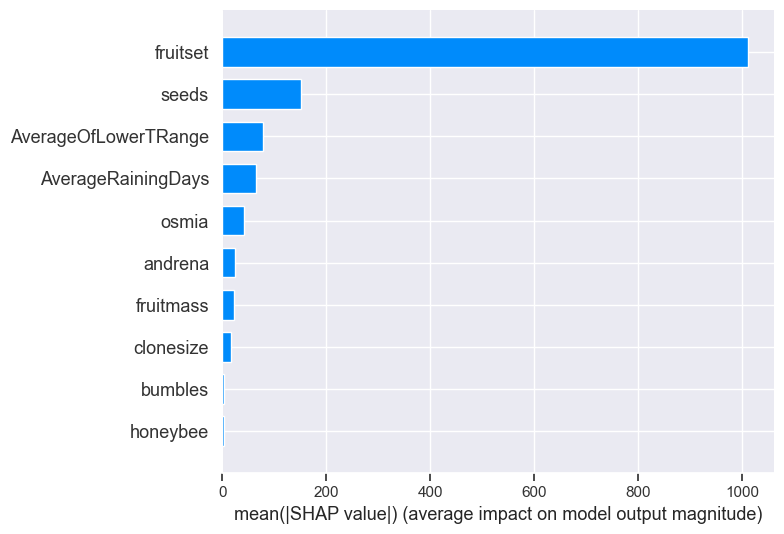

In [49]:
# summary plot of XGB test set as the impact value
shap.summary_plot(shap_values, X_test_xgb, plot_type="bar")

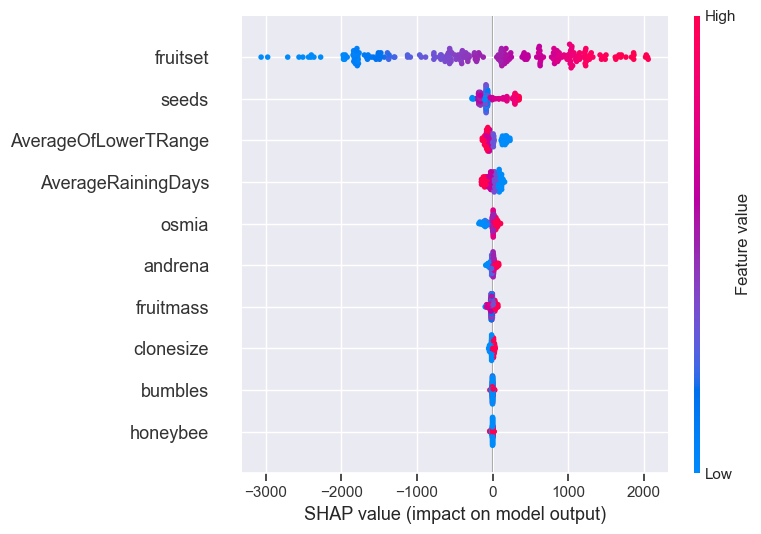

In [50]:
shap.summary_plot(shap_values, X_test_xgb)

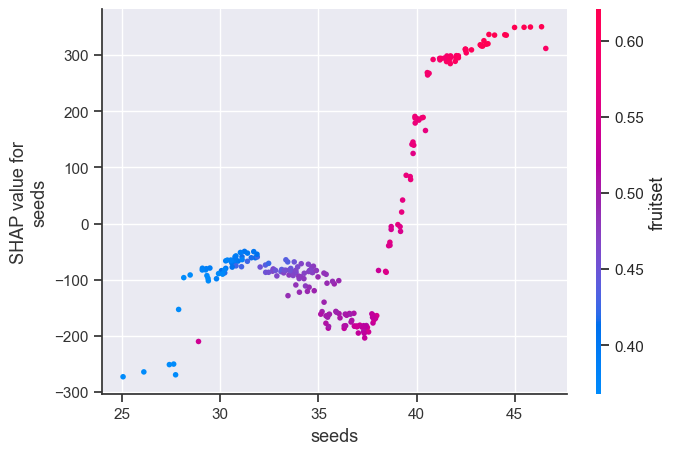

In [51]:
shap.dependence_plot('seeds', shap_values, X_test_xgb)

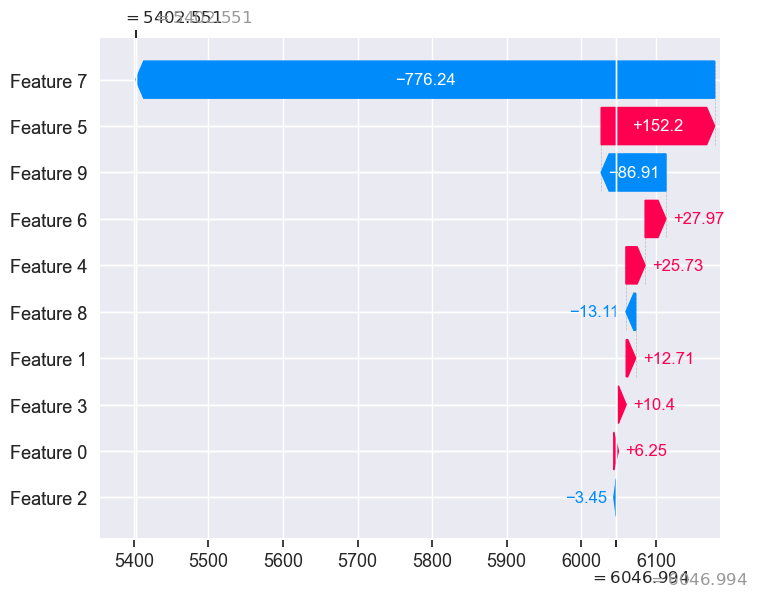

In [52]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(final_model).expected_value[0], shap_values[row])

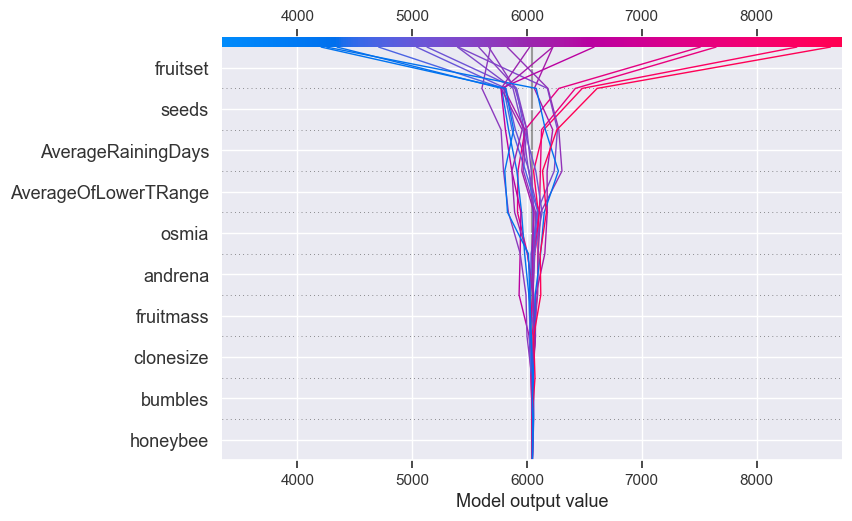

In [53]:
shap.decision_plot(shap.TreeExplainer(final_model).expected_value[0], shap_values[110:130], feature)

In [54]:
X_test_xgb.to_csv('X_test_xgb.csv')